<a href="https://colab.research.google.com/github/Elmir22/Data-science/blob/main/decision_trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn import datasets

In [37]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

X, y = make_moons(n_samples=1000, noise=0.15, random_state=42)



In [38]:
X.shape

(1000, 2)

In [39]:
y.shape

(1000,)

In [40]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [41]:
X_train.shape

(800, 2)

In [42]:
y_train.shape

(800,)

In [43]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [44]:
tree_clf.score(X_test, y_test)

0.925

In [45]:
tree_clf.score(X_train, y_train)

0.91625

In [46]:
from sklearn.model_selection import GridSearchCV
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9]
             }
tree_clf = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator=tree_clf, param_grid=param_grid, cv=3)
grid_search.fit(X_train, y_train)

In [47]:
grid_search.score(X_train, y_train)

0.8875

In [48]:
grid_search.score(X_test, y_test)

0.895

In [49]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris(as_frame=True)
X_iris = iris.data[["petal length (cm)","petal width (cm)"]].values
y_iris = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X_iris, y_iris)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [50]:
from pathlib import Path
IMAGES_PATH = Path() / "images" / "decision_trees"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

In [51]:
from sklearn.tree import export_graphviz

export_graphviz(
    tree_clf,
    out_file=str(IMAGES_PATH/"iris_tree.dot"),
    feature_names=["petal length (cm)", "petal width (cm)"],
    class_names=iris.target_names,
    rounded = True,
    filled = True
)

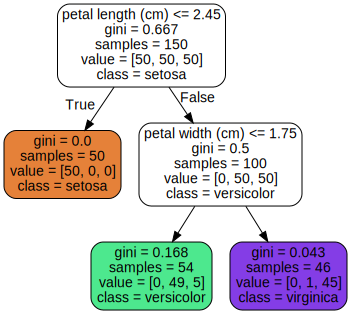

In [52]:
from graphviz import Source
Source.from_file(IMAGES_PATH/"iris_tree.dot")

#Estimating Class Probabilities

In [53]:
tree_clf.predict_proba([[5, 1.5]]).round(3)

array([[0.   , 0.907, 0.093]])

In [56]:
tree_clf.predict([[5, 1.5]])

array([1])

#Regularization Hyperparameters

In [58]:
from sklearn.datasets import make_moons
X_moons, y_moons = make_moons(n_samples=150, noise=0.2, random_state=42)

tree_clf1 = DecisionTreeClassifier(random_state=42)
tree_clf2 = DecisionTreeClassifier(min_samples_leaf=5, random_state=42)

tree_clf1.fit(X_moons, y_moons)
tree_clf2.fit(X_moons, y_moons)

DecisionTreeClassifier(min_samples_leaf=5, random_state=42)

In [59]:
X_moons_test, y_moons_test = make_moons(n_samples=1000, noise=0.2, random_state=43)
tree_clf1.score(X_moons_test, y_moons_test)

0.898

In [60]:
tree_clf2.score(X_moons_test, y_moons_test)

0.92

#Regression

In [61]:
from sklearn.tree import DecisionTreeRegressor

np.random.seed(42)
X_quad = np.random.rand(200,1) - 0.5
y_quad = X_quad**2 + 0.025 * np.random.randn(200,1)

tree_reg = DecisionTreeRegressor(max_depth =2, random_state=42)
tree_reg.fit(X_quad, y_quad)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [62]:
tree_reg.score(X_quad, y_quad)

0.7966018355059642

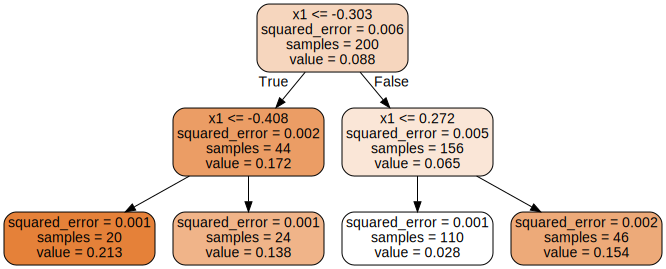

In [63]:
export_graphviz(
    tree_reg,
    out_file = str(IMAGES_PATH / "regression_tree.dot"),
    feature_names = ["x1"],
    rounded = True,
    filled = True
)
Source.from_file(IMAGES_PATH/"regression_tree.dot")

In [64]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pca_pipeline = make_pipeline(StandardScaler(), PCA())
X_iris_rotated = pca_pipeline.fit_transform(X_iris)
tree_clf_pca = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf_pca.fit(X_iris_rotated, y_iris)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [65]:
tree_clf_pca.score(X_iris_rotated, y_iris)

0.98

In [66]:
X, y = make_moons(n_samples=10000, noise=0.4, random_state=42)

In [67]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [68]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [69]:
tree_clf.score(X_train, y_train)

0.859875

In [70]:
tree_clf.score(X_test, y_test)

0.8485

In [80]:
from sklearn.model_selection import GridSearchCV
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],
              'max_leaf_nodes': [None]
             }
tree_clf = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator=tree_clf, param_grid=param_grid, cv=3)
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001],
                         'max_depth': [5, 6, 7, 8, 9],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'max_leaf_nodes': [None]})

In [81]:
grid_search.score(X_train, y_train)

0.845625

In [82]:
grid_search.score(X_test, y_test)

0.838

In [83]:
grid_search.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.001, max_depth=7, max_features='sqrt')

In [84]:
grid_search.best_params_

{'ccp_alpha': 0.001,
 'max_depth': 7,
 'max_features': 'sqrt',
 'max_leaf_nodes': None}

In [85]:
grid_search.best_score_

0.8606246049701403